In [13]:

import pyautogui
import time
import webbrowser
import pandas as pd
import bs4
import pyperclip
import numpy as np
import os
import re
import math
from datetime import datetime, timedelta
from collections import Counter

from urllib.parse import urlparse
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

In [24]:
df_venture = pd.read_csv('../Data/ico_manully.csv')
df_venture

,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [26]:
def date_clean(date_str):
     date_str = str(date_str)
     if len(date_str) == 0:
        return None
     try:
          
          return datetime.strptime(date_str, "%Y-%m-%d")
     except ValueError:
          
          return None
     
df_venture['ICO End'] = df_venture['ICO End'].apply(date_clean)
df_venture['ICO Start'] = df_venture['ICO Start'].apply(date_clean)
df_venture

,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [27]:
df_venture['ICO Days'] = df_venture['ICO End']-df_venture['ICO Start']+ timedelta(days=1)
col_name = df_venture.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_venture[c].isnull())
     print(f"Label:{c},number:#{n}")


Label:Unnamed: 0,number:#794
Label:Project,number:#794
Label:Abbr,number:#794
Label:Link,number:#794
Label:Sale Price,number:#781
Label:ROI,number:#748
Label:Total Raise,number:#581
Label:Launchpad,number:#104
Label:Ended,number:#599
Label:When,number:#599
Label:Funds,number:#257
Label:Type,number:#794
Label:Raise,number:#571
Label:Initial Cap,number:#119
Label:Market Cap,number:#707
Label:Blockchain,number:#674
Label:Category,number:#544
Label:Listing Date,number:#761
Label:ATH ROI,number:#748
Label:ICO Days,number:#715
Label:Rounds,number:#794
Label:ICO Order,number:#794
Label:Social,number:#794
Label:Funds and Investors,number:#257
Label:Investor Count,number:#794
Label:ICO Start,number:#715
Label:ICO End,number:#715
Label:Soft Cap,number:#24
Label:Hard Cap,number:#547
Label:ICO Raised,number:#794
Label:Other Link,number:#2
Label:Success,number:#794
Label:github,number:#479
Label:code_available,number:#794
Label:social_media,number:#794
Label:is_Ethereum,number:#674
Label:expert,num

In [9]:
df_investor = pd.read_csv('../Data/venture_table.csv')
df_investor

,Unnamed: 0,Name,Link,Tier,Type,Location,Portfolio,# Investments
0,0,Coinbase Ventures,https://cryptorank.io/funds/coinbase-ventures,1.0,Venture,United States,FTX TokenYuga LabsAmber Group,340
1,1,Andreessen Horowitz (a16z),https://cryptorank.io/funds/andreessen-horowitz,1.0,Venture,United States,RobinhoodForteCross River,210
2,2,Pantera Capital,https://cryptorank.io/funds/pantera-capital,1.0,Venture,United States,AlchemyBakktAmber Group,179
3,3,Polychain Capital,https://cryptorank.io/funds/polychain-capital,1.0,Venture,United States,SolanaCoinbaseCoinDCX,177
4,4,HashKey Capital,https://cryptorank.io/funds/hash-key-capital,1.0,Venture,Hong Kong,Secret NetworkCoinlistAssembly,165
...,...,...,...,...,...,...,...,...
8910,8910,Zett.eth,https://cryptorank.io/funds/zett-eth,NaN,Angel Investor,Sweden,DoinGud,1
8911,8911,Zhixian,https://cryptorank.io/funds/zhixian,NaN,Angel Investor,NaN,DeSchool,1
8912,8912,Zhu Deming,https://cryptorank.io/funds/zhudeming,NaN,Angel Investor,NaN,Rivermen,1
8913,8913,ZLOY,https://cryptorank.io/funds/zloy,NaN,Angel Investor,NaN,RareRound,1


In [10]:

col_name = df_investor.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_investor[c].isnull())
     print(f"Label:{c},number:#{n}")

Label:Name,number:#8915
Label:Link,number:#8915
Label:Tier,number:#5434
Label:Type,number:#8915
Label:Location,number:#5794
Label:Portfolio,number:#8915
Label:# Investments,number:#8915


['GameFi', 'Blockchain Infrastructure', 'Chain', 'DeFi', 'Blockchain Service', 'NFT', 'CeFi', 'Social', 'Currency'] 
 [39, 73, 78, 88, 175, 7, 32, 31, 21]


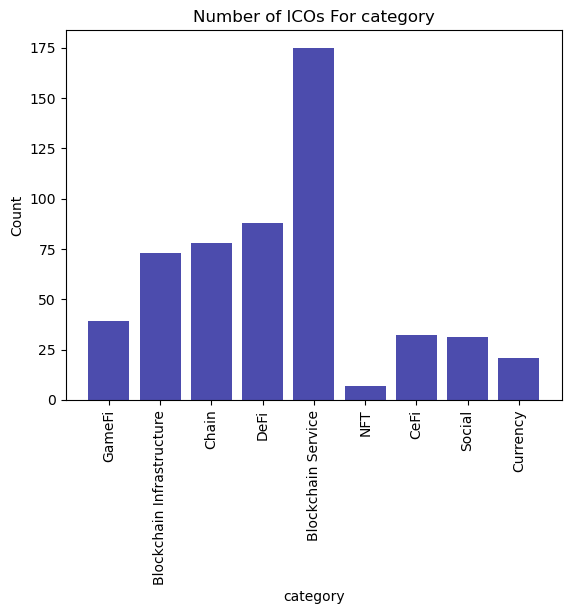

In [49]:
category_list = df_venture['Category']
category_counts = Counter(category_list)


# 提取年份和计数
categorys = list(category_counts.keys())
categorys = [item for item in categorys if type(item)==type('str')]
counts = [int(category_counts.get(key)) for key in categorys]
print(categorys,'\n',counts)
# 创建柱状图
plt.bar(categorys, counts, color='darkblue', alpha=0.7)

# 添加标签和标题
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Number of ICOs For category')
plt.xticks(rotation = 90)

# 显示图形
plt.show()

     year  Failures  Successes
0  2014.0         0          1
1  2015.0         0          3
2  2016.0         3          4
3  2017.0        39        188
4  2018.0        82        231
5  2019.0         3         23
6  2020.0         4         37
7  2021.0         3         55
8  2022.0         2         27
9  2023.0         0         10


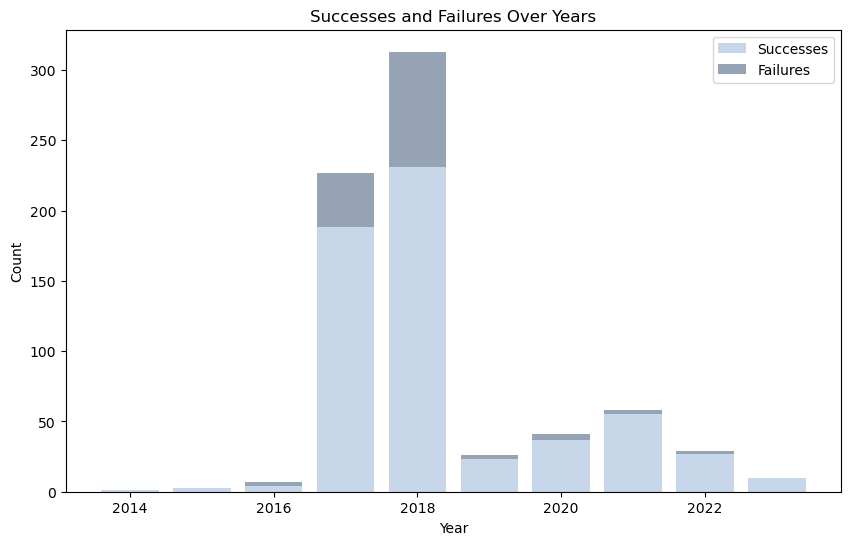

In [72]:
df_1 = df_venture.loc[:,['ICO Start', 'Success']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'Success']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Failures', 'Successes']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Successes'], label='Successes', color='#B0C6E1', alpha=0.7)#DDEAF7
plt.bar(grouped_df['year'], grouped_df['Failures'], bottom=grouped_df['Successes'], label='Failures', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Successes and Failures Over Years')
plt.legend()
plt.show()


     year  Other  Ethereum
0  2015.0      1         1
1  2016.0      1         6
2  2017.0     31       174
3  2018.0     30       246
4  2019.0      5        15
5  2020.0     10        22
6  2021.0     24        29
7  2022.0     15         8
8  2023.0      5         2


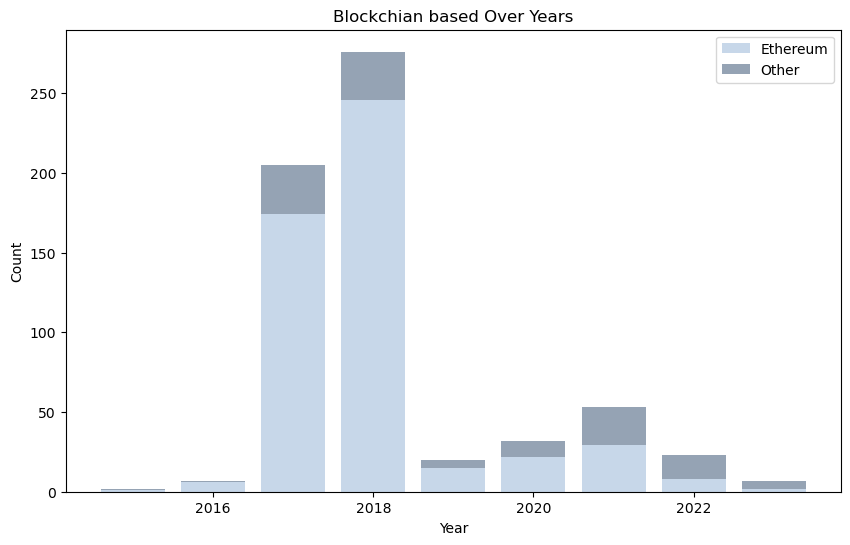

In [111]:
df_1 = df_venture.loc[:,['ICO Start', 'is_Ethereum']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'is_Ethereum']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Other', 'Ethereum']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Ethereum'], label='Ethereum', color='#B0C6E1', alpha=0.7)#DDEAF7
plt.bar(grouped_df['year'], grouped_df['Other'], bottom=grouped_df['Ethereum'], label='Other', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Blockchian based Over Years')
plt.legend()
plt.show()


                    Category  Failures  Successes
0  Blockchain Infrastructure        13         60
1         Blockchain Service        22        153
2                       CeFi         4         28
3                      Chain         5         73
4                   Currency        12          9
5                       DeFi        13         75
6                     GameFi         7         32
7                        NFT         2          5
8                     Social        12         19


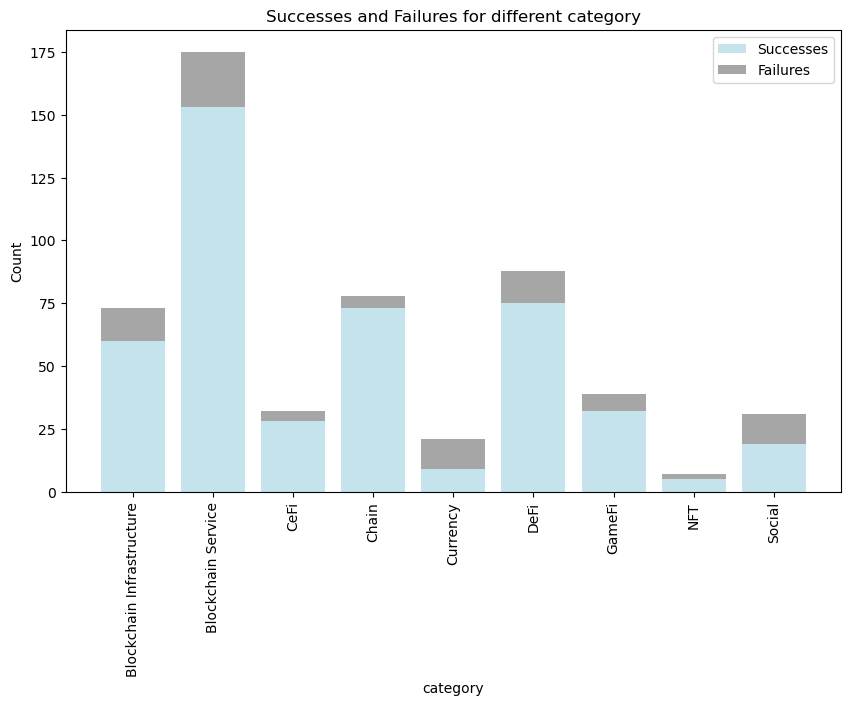

In [76]:
df_2 = df_venture.loc[:,['Category', 'Success']]

# Group by year and success, then count the occurrences
grouped_df = df_2.groupby(['Category', 'Success']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['Failures', 'Successes']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['Category'], grouped_df['Successes'], label='Successes', color='lightblue', alpha=0.7)
plt.bar(grouped_df['Category'], grouped_df['Failures'], bottom=grouped_df['Successes'], label='Failures', color='grey', alpha=0.7)

plt.xlabel('category')
plt.ylabel('Count')
plt.title('Successes and Failures for different category')
plt.xticks(rotation=90)


plt.legend()
plt.show()


     Group  Count                 Label
0  Group 1    137         Group 1:1 day
1  Group 2    130      Group 2:2-5 days
2  Group 3     55     Group 3:6-10 days
3  Group 4     78    Group 4:11-20 days
4  Group 5     92    Group 5:21-30 days
5  Group 6    109    Group 6:31-40 days
6  Group 7     43    Group 7:41-60 days
7  Group 8     47   Group 8:61-100 days
8  Group 9     24  Group 9:100-400 days


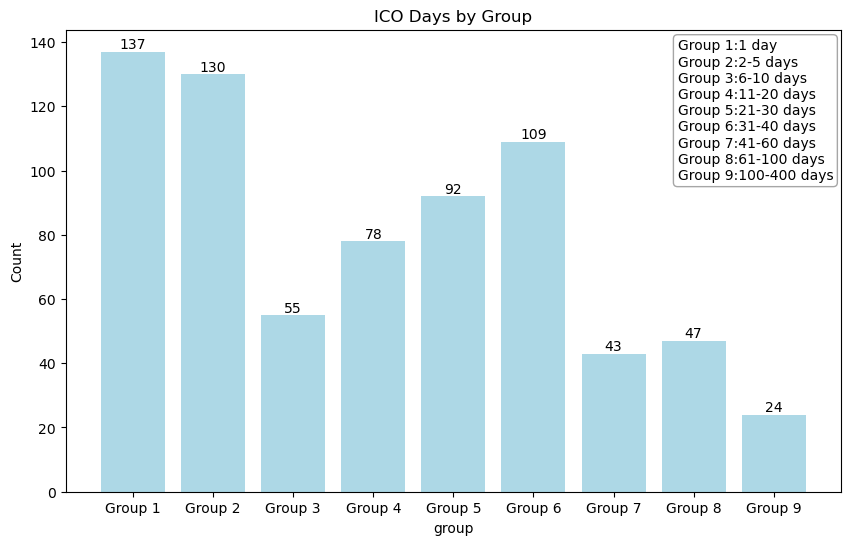

In [191]:
# Define bin edges
bins = [0, 1, 5, 10, 20, 30, 40, 60, 100, 400]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_3 = df_venture.loc[:,['ICO Days', 'Success']]
# Create a new column 'group' based on the bin intervals
df_3['group'] = pd.cut(df_3['ICO Days'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_3.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = ['Group 1:1 day',
                   'Group 2:2-5 days',
                   'Group 3:6-10 days',
                   'Group 4:11-20 days',
                   'Group 5:21-30 days',
                   'Group 6:31-40 days',
                   'Group 7:41-60 days',
                   'Group 8:61-100 days',
                   'Group 9:100-400 days']
print(groups)

plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Days by Group')

# Display count on top of each bar
for i, value in enumerate(groups['Count']):
    plt.text(i, value, str(value), ha='center', va='bottom')

box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 2.2, len(groups['Label']) +132 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)

# Show the plot
plt.show()

     Group  Count                     Label
0  Group 1    578      group 1:up to $0.000
1  Group 2     59      group 2:up to $0.405
2  Group 3     20      group 3:up to $0.693
3  Group 4     43      group 4:up to $0.916
4  Group 5     12      group 5:up to $1.099
5  Group 6      4  group 8:more than $1.253


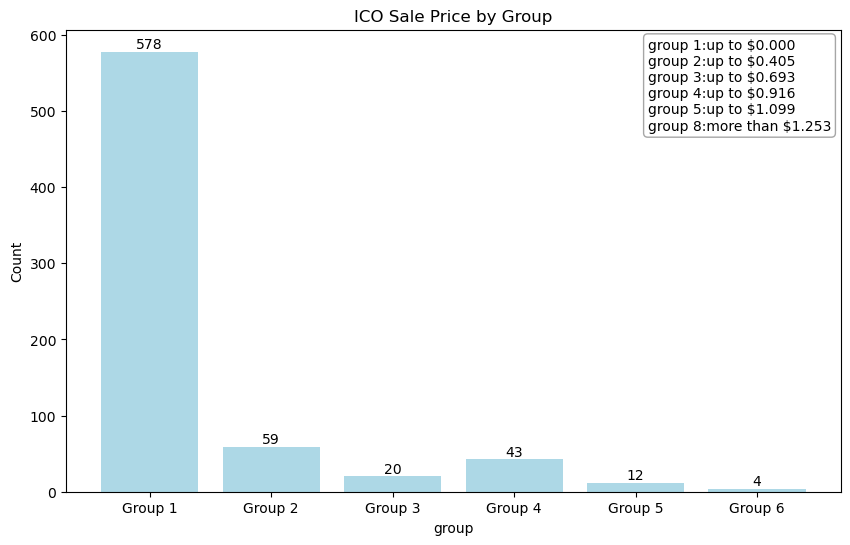

In [198]:
# Define bin edges
bins = [np.log(i/2) for i in range(2,9,1)]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_4 = df_venture.loc[:,['Sale Price', 'Success']]
# Create a new column 'group' based on the bin intervals
df_4['group'] = pd.cut(df_4['Sale Price'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_4.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = [f'group {i}:up to ${np.log((i+1)/2):.3f}' for i in range(1,6)]+[f'group 7:more than ${np.log(3.5):.3f}']
print(groups)


plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Sale Price by Group')
for i, value in enumerate(groups['Count']):
    plt.text(i , value, str(value), ha='center', va='bottom')
box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 1.9, len(groups['Label']) +590 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)

# Show the plot
plt.show()

In [145]:
l = df_venture[df_venture['ICO Raised']>0]['ICO Raised'].apply(np.log)
print(f'{sorted(l,reverse=True)}')
print(f'max:{max(l)}. min:{min(l)}')

[23.007177664674835, 22.15760589566544, 21.82187812561452, 21.128730945054574, 19.583831553758046, 19.471502368784126, 19.401784959158523, 18.877382703188523, 18.85116361503582, 18.850968537491877, 18.84594847935671, 18.789689315049916, 18.643824295266576, 18.494534248732013, 18.48271613487182, 18.480254498507048, 18.420680743952367, 18.420680743952367, 18.381884789376386, 18.373296892461546, 18.35958376059078, 18.197537192638155, 18.172219384653864, 18.161910014995005, 18.146243898250606, 18.07254070246347, 18.056654488068617, 17.98989782785991, 17.95794931206454, 17.95195629620501, 17.942644943009366, 17.9165364006408, 17.909855120186375, 17.89676988063772, 17.893048001869992, 17.776323727561852, 17.771550448809194, 17.7667542765457, 17.760135555673134, 17.72753356339242, 17.72753356339242, 17.72753356339242, 17.7073308560749, 17.70221575540813, 17.697074355907713, 17.68316361565648, 17.676240269004868, 17.661172710817084, 17.65271287885802, 17.652124998141737, 17.643690978655133, 17

       Group  Count                              Label
0    Group 1      3           group 1:up to $22026.466
1    Group 2      4           group 2:up to $59874.142
2    Group 3     10          group 3:up to $162754.791
3    Group 4     14          group 4:up to $442413.392
4    Group 5     28         group 5:up to $1202604.284
5    Group 6     51         group 6:up to $3269017.372
6    Group 7     88         group 7:up to $8886110.521
7    Group 8    223        group 8:up to $24154952.754
8    Group 9    131        group 9:up to $65659969.137
9   Group 10     20      group 10:up to $178482300.963
10  Group 11      7  group 11:more than $178482300.963


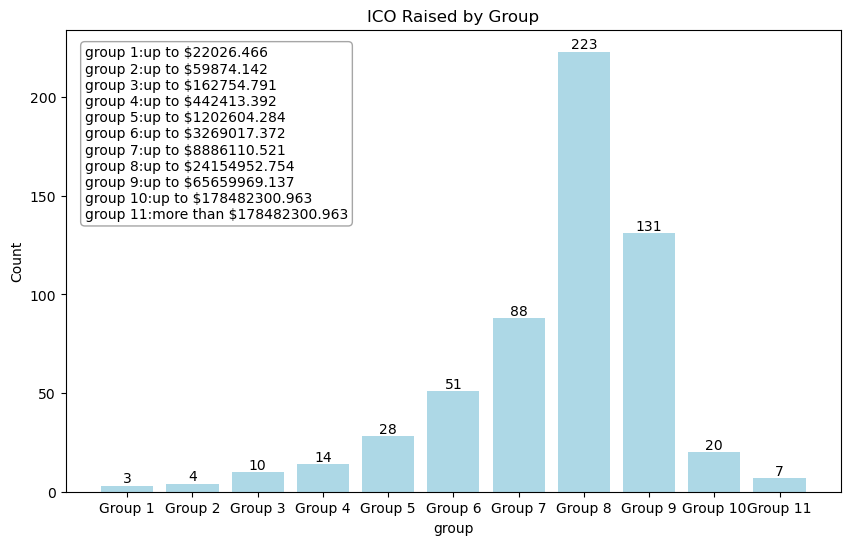

In [208]:
# Define bin edges
bins = list(range(9,20,1))+[24]
bin_labels = [f'Group {i+1}' for i in range(len(bins)-1)]


df_5 = df_venture.loc[:,['ICO Raised', 'Success']]
df_5['Log ICO Raised'] = df_5['ICO Raised'].apply(np.log)
# Create a new column 'group' based on the bin intervals
df_5['group'] = pd.cut(df_5['Log ICO Raised'], bins=bins, labels=bin_labels)

# Plot the distribution for each group
groups = df_5.groupby('group').size()#.unstack(fill_value=0)
# Rename the columns for clarity


# Reset the index to make 'year' a regular column
groups = groups.reset_index()
groups.columns = ['Group','Count']
groups['Label'] = [f'group {i-9}:up to ${np.exp(i):.3f}' for i in range(10,20)]+[f'group 11:more than ${np.exp(19):.3f}']
print(groups)

plt.figure(figsize=(10, 6))
plt.bar(groups['Group'],groups['Count'],label=groups['Label'],color='lightblue')
# Adding labels and title

plt.xlabel('group')
plt.ylabel('Count')
plt.title('ICO Raised by Group')
for i, value in enumerate(groups['Count']):
    plt.text(i , value, str(value), ha='center', va='bottom')

box_text = '\n'.join(groups['Label'])
plt.text(len(groups) - 11.65, len(groups['Label']) +215 , box_text,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7),
         ha='left', va='top', fontsize=10)
# Show the plot
plt.show()